# VICTORIA HOUSING ANALYSIS

## Data Preprocessing 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)

In [2]:
house = pd.read_csv('../data/curated/merge_data_v2.csv')
# house.head(3)

#### 1. Price extraction

In [3]:
import re

# extract rent price 
p='([\d]{1,}[,][\d]{2,}|[\d]{2,4})'
house['rent price'] = house.price.str.extract(p) #.astype(float)


In [4]:
from xml.etree.ElementPath import find

house[house['rent price']=="1,450"]['rent price'].str.replace(',', "")


264      1450
423      1450
21770    1450
22563    1450
26406    1450
62177    1450
93464    1450
Name: rent price, dtype: object

In [5]:
house['rent price'] = house['rent price'].str.replace(',', "")
house['rent price'] = house['rent price'].astype(float)

In [6]:
# house['rent price'] = house['rent price'].astype(float)

In [7]:
# house.loc[(house.rent != 'NaN'),'rent_price']=house.rent
# house = house.assign(rent_price=np.where(house.rent.isnull(), house['rent price'], house['rent']))
# house = house.drop(['rent price'], axis=1)

In [6]:
house[house['rent price']<150]

,Unnamed: 0,index,propertyTypes,bathrooms,bedrooms,carspaces,dateUpdated,dateListed,geoLocation,landAreaSqm,postcode,surburb,year,month,price,bond,rent,longitude,latitude,geometry,index_right,SA2_maincode_2021,distance of the closest bus stop,count of bus stop,distance of the closest train stop,count of train stop,distance of the closest tram stop,count of tram stop,distance of the closest vline stop,count of vline stop,distance of the closest school,count of school,count of hospital,distance to the closest shopping mall,count of shopping mall,bench,cafe,childcare,fast_food,kindergarten,parking,restaurant,place_of_worship,school,university,garden,park,playground,pitch,offence count,incidents recorded,Population,Population Increase,Earners (persons),Median age of earners (years),Sum ($),Median ($),Mean ($),Male,Female,Person,Male Ratio,Female Ratio,rent price
5782,5782,38447,"['offices', 'medicalConsulting', 'retail', 'se...",0.0,0.0,0.0,2022-02-07T07:34:56.24Z,2018-02-01T07:09:06Z,"{""latitude"": -37.8357683, ""longitude"": 144.973...",NaN,3004,melbourne,2022,2,$50k per year. flexible terms,NaN,50.0,144.973876,-37.835768,POINT (144.9738758 -37.8357683),785,206051128,0.474419,3,NaN,0,0.469901,6,NaN,0,0.473209,4.0,3,NaN,0,86.0,50.0,0.0,10.0,1.0,128.0,86.0,6.0,2.0,8.0,46.0,28.0,6.0,11.0,51905.0,25831.0,15936.911524,-0.005373,12806.908285,44.563061,1.705666e+09,69465.138466,129707.632203,7735.997516,8202.100418,15936.911524,0.485414,0.514661,50.0
5892,5892,51377,['carspace'],0.0,0.0,1.0,2019-03-24T23:31:36.177Z,2018-10-29T02:06:15Z,"{""latitude"": -37.8387717, ""longitude"": 144.975...",NaN,3004,melbourne,2019,3,50.0,217.0,NaN,144.975575,-37.838772,POINT (144.9755755 -37.8387717),785,206051128,0.471887,3,NaN,0,0.467345,6,NaN,0,0.470610,4.0,3,NaN,0,86.0,50.0,0.0,10.0,1.0,128.0,86.0,6.0,2.0,8.0,46.0,28.0,6.0,11.0,51905.0,25831.0,17071.000000,0.020993,11999.357411,44.255814,1.473181e+09,68185.664938,122800.014792,8529.000000,8542.000000,17071.000000,0.499619,0.500381,50.0
5893,5893,51378,['carspace'],0.0,0.0,1.0,2019-03-24T23:31:23.23Z,2018-10-29T02:07:44Z,"{""latitude"": -37.8387717, ""longitude"": 144.975...",NaN,3000,melbourne,2019,3,50.0,217.0,NaN,144.975575,-37.838772,POINT (144.9755755 -37.8387717),785,206051128,0.426982,19,NaN,0,0.425963,23,0.424659,1,0.425998,4.0,4,0.235081,26,31.0,20.0,0.0,8.0,1.0,56.0,13.0,4.0,3.0,0.0,3.0,15.0,4.0,6.0,161725.0,125561.0,17071.000000,0.020993,11999.357411,44.255814,1.473181e+09,68185.664938,122800.014792,8529.000000,8542.000000,17071.000000,0.499619,0.500381,50.0
5894,5894,51379,['parkingCarSpace'],0.0,0.0,0.0,2019-03-24T23:30:54.873Z,2018-10-29T02:10:14Z,"{""latitude"": -37.8387717, ""longitude"": 144.975...",NaN,3004,melbourne,2019,3,$50 per week,NaN,50.0,144.975575,-37.838772,POINT (144.9755755 -37.8387717),785,206051128,0.471887,3,NaN,0,0.467345,6,NaN,0,0.470610,4.0,3,NaN,0,86.0,50.0,0.0,10.0,1.0,128.0,86.0,6.0,2.0,8.0,46.0,28.0,6.0,11.0,51905.0,25831.0,17071.000000,0.020993,11999.357411,44.255814,1.473181e+09,68185.664938,122800.014792,8529.000000,8542.000000,17071.000000,0.499619,0.500381,50.0
5895,5895,51380,['parkingCarSpace'],0.0,0.0,0.0,2019-03-24T23:30:47.273Z,2018-10-29T02:20:33Z,"{""latitude"": -37.8387717, ""longitude"": 144.975...",NaN,3004,melbourne,2019,3,$50 per week,NaN,50.0,144.975575,-37.838772,POINT (144.9755755 -37.8387717),785,206051128,0.471887,3,NaN,0,0.467345,6,NaN,0,0.470610,4.0,3,NaN,0,86.0,50.0,0.0,10.0,1.0,128.0,86.0,6.0,2.0,8.0,46.0,28.0,6.0,11.0,51905.0,25831.0,17071.000000,0.020993,11999.357411,44.255814,1.473181e+09,68185.664938,122800.014792,8529.000000,8542.000000,17071.000000,0.499619,0.500381,50.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114940,114940,115447,['industrialWarehouse'],0.0,0.0,1.0,2022-05-22T06:11:10.97Z,2021-06-23T00:41:24Z,"

In [7]:
house['rent_price'].value_counts()

KeyError: 'rent_price'

/var/folders/74/fx737_kn4xj3gvzzm58zqvm00000gn/T/ipykernel_19954/2183122231.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x)


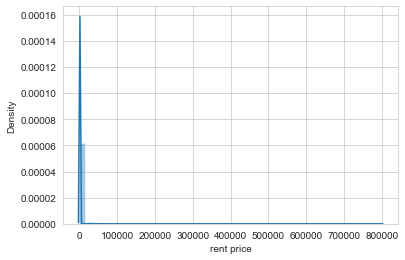

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/var/folders/74/fx737_kn4xj3gvzzm58zqvm00000gn/T/ipykernel_19954/2183122231.py:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x)


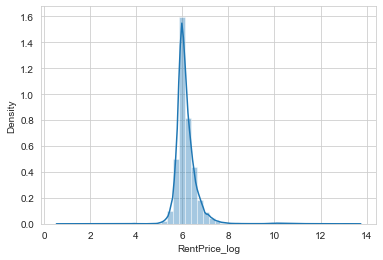

In [9]:
## check if we need to log the rental price as the price might be skewed
import seaborn as sns 
import matplotlib 
import matplotlib.pyplot as plt

x = house["rent price"]
sns.set_style('whitegrid')
sns.distplot(x)
plt.show()

house['RentPrice_log'] = np.log(house["rent price"])
x = house['RentPrice_log']
sns.distplot(x)
plt.show()

#### 2. Define Suburb
remove all suburb that has less than 10 properties within region

In [10]:
house.shape

(114960, 65)

In [9]:
# from numpy import average

# average(house['postcode'].value_counts())

In [10]:
# house['postcode'].value_counts()

In [11]:
## currently set to 10, if we set it to average then we only got 196 suburb left. 
## distinct suburb included in the orginal dataset was 478
# N = 10
# newdf = house[house.groupby('postcode')['postcode'].transform('count')>N].copy()


In [11]:
newdf = house
newdf['postcode'].value_counts()

3000    9819
3008    4582
3006    3464
3029    3163
3141    2872
        ... 
3517       1
3566       1
3341       1
3342       1
3747       1
Name: postcode, Length: 482, dtype: int64

#### 3. Rooms
 - bedroom 
 - bathroom 
 - carspace

In [12]:
newdf['bathrooms'].value_counts().sort_values(ascending=False)

1.0     61815
2.0     46109
3.0      4048
0.0      2484
4.0       416
5.0        62
6.0        14
8.0         6
12.0        3
25.0        1
9.0         1
32.0        1
Name: bathrooms, dtype: int64

In [13]:
Q1 = newdf['bedrooms'].quantile(0.25)
Q3 = newdf['bedrooms'].quantile(0.75)
IQR = Q3-Q1
newdf = newdf[(newdf['bedrooms'] > (Q1 - 3*IQR)) & (newdf['bedrooms'] < (Q3 + 3*IQR))]

{'whiskers': [<matplotlib.lines.Line2D at 0x7fd8fbc8d130>,
 'caps': [<matplotlib.lines.Line2D at 0x7fd8fbc8d6d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fd8fbc7fe20>],
 'medians': [<matplotlib.lines.Line2D at 0x7fd8fbc8dc70>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fd8fbc8df40>],
 'means': []}

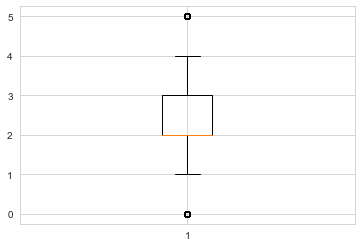

In [14]:
plt.boxplot(newdf['bedrooms'])

In [15]:
newdf['bathrooms'].value_counts().sort_values(ascending=False)

1.0     61809
2.0     46019
3.0      3947
0.0      2484
4.0       367
5.0        51
8.0         5
6.0         4
12.0        3
25.0        1
32.0        1
Name: bathrooms, dtype: int64

In [16]:
Q1 = newdf['bathrooms'].quantile(0.25)
Q3 = newdf['bathrooms'].quantile(0.75)
IQR = Q3-Q1
newdf = newdf[(newdf['bathrooms'] > (Q1 - 3*IQR)) & (newdf['bathrooms'] < (Q3 + 3*IQR))]

{'whiskers': [<matplotlib.lines.Line2D at 0x7fd8fb2572b0>,
 'caps': [<matplotlib.lines.Line2D at 0x7fd8fb257850>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fd8fb1f1fa0>],
 'medians': [<matplotlib.lines.Line2D at 0x7fd8fb257df0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fd8fb265100>],
 'means': []}

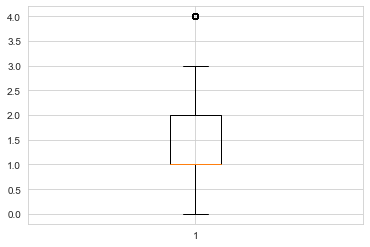

In [17]:
plt.boxplot(newdf['bathrooms'])

In [18]:
newdf['carspaces'].value_counts().sort_values(ascending=False)

1.0      50172
2.0      35086
0.0      23224
3.0       2863
4.0       2351
5.0        331
6.0        316
8.0         77
7.0         61
10.0        38
15.0        13
9.0         13
12.0        11
20.0         9
16.0         7
14.0         7
11.0         6
24.0         4
13.0         4
23.0         4
18.0         3
30.0         3
85.0         3
36.0         2
50.0         2
17.0         2
22.0         2
76.0         1
26.0         1
31.0         1
56.0         1
67.0         1
200.0        1
130.0        1
109.0        1
33.0         1
28.0         1
38.0         1
32.0         1
Name: carspaces, dtype: int64

In [19]:
Q1 = newdf['carspaces'].quantile(0.25)
Q3 = newdf['carspaces'].quantile(0.75)
IQR = Q3-Q1
newdf = newdf[(newdf['carspaces'] > (Q1 - 3*IQR)) & (newdf['carspaces'] < (Q3 + 3*IQR))]

{'whiskers': [<matplotlib.lines.Line2D at 0x7fd8e25aa550>,
 'caps': [<matplotlib.lines.Line2D at 0x7fd8e25aaaf0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fd8e25aa280>],
 'medians': [<matplotlib.lines.Line2D at 0x7fd8e25b80d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fd8e25b83a0>],
 'means': []}

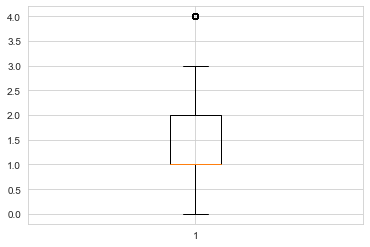

In [20]:
plt.boxplot(newdf['carspaces'])

#### 4. Bond
where property has bond it will be 1 else 0

In [21]:
newdf = newdf.drop(['Unnamed: 0','price','rent','geometry', 'geoLocation','index_right'], axis=1)
newdf = newdf.assign(has_bond=np.where(newdf.bond.isnull(), 0, 1))
newdf = newdf.drop(['bond'], axis=1)
newdf.head(3)

,index,propertyTypes,bathrooms,bedrooms,carspaces,dateUpdated,dateListed,landAreaSqm,postcode,surburb,year,month,longitude,latitude,SA2_maincode_2021,distance of the closest bus stop,count of bus stop,distance of the closest train stop,count of train stop,distance of the closest tram stop,count of tram stop,distance of the closest vline stop,count of vline stop,distance of the closest school,count of school,count of hospital,distance to the closest shopping mall,count of shopping mall,bench,cafe,childcare,fast_food,kindergarten,parking,restaurant,place_of_worship,school,university,garden,park,playground,pitch,offence count,incidents recorded,Population,Population Increase,Earners (persons),Median age of earners (years),Sum ($),Median ($),Mean ($),Male,Female,Person,Male Ratio,Female Ratio,rent price,RentPrice_log,has_bond
0,0,['apartmentUnitFlat'],1.0,1.0,0.0,2019-01-09T00:23:18.123Z,2016-02-16T04:33:49Z,NaN,3205,south melbourne,2019,1,144.960873,-37.834163,206051512,0.436505,10,NaN,0,0.438447,24,NaN,0,0.441059,3.0,0,NaN,0,11.0,41.0,4.0,17.0,3.0,30.0,40.0,6.0,1.0,0.0,8.0,16.0,10.0,5.0,22895.0,17201.0,12753.0,0.003541,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,360.0,5.886104,0
1,9,['house'],2.0,2.0,1.0,2019-01-11T17:10:21.69Z,2018-10-24T23:20:07Z,NaN,3205,south melbourne,2019,1,144.964862,-37.835075,206051512,0.432419,10,NaN,0,0.434362,24,NaN,0,0.436974,3.0,0,NaN,0,11.0,41.0,4.0,17.0,3.0,30.0,40.0,6.0,1.0,0.0,8.0,16.0,10.0,5.0,22895.0,17201.0,12753.0,0.003541,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,725.0,6.586172,0
2,10,['apartmentUnitFlat'],1.0,2.0,0.0,2019-01-03T02:02:17.513Z,2018-10-25T00:57:25Z,NaN,3205,south melbourne,2019,1,144.960818,-37.840217,206051512,0.434637,10,NaN,0,0.436558,24,NaN,0,0.439169,3.0,0,NaN,0,11.0,41.0,4.0,17.0,3.0,30.0,40.0,6.0,1.0,0.0,8.0,16.0,10.0,5.0,22895.0,17201.0,12753.0,0.003541,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,500.0,6.214608,0


In [22]:
newdf.head(10)

,index,propertyTypes,bathrooms,bedrooms,carspaces,dateUpdated,dateListed,landAreaSqm,postcode,surburb,year,month,longitude,latitude,SA2_maincode_2021,distance of the closest bus stop,count of bus stop,distance of the closest train stop,count of train stop,distance of the closest tram stop,count of tram stop,distance of the closest vline stop,count of vline stop,distance of the closest school,count of school,count of hospital,distance to the closest shopping mall,count of shopping mall,bench,cafe,childcare,fast_food,kindergarten,parking,restaurant,place_of_worship,school,university,garden,park,playground,pitch,offence count,incidents recorded,Population,Population Increase,Earners (persons),Median age of earners (years),Sum ($),Median ($),Mean ($),Male,Female,Person,Male Ratio,Female Ratio,rent price,RentPrice_log,has_bond
0,0,['apartmentUnitFlat'],1.0,1.0,0.0,2019-01-09T00:23:18.123Z,2016-02-16T04:33:49Z,NaN,3205,south melbourne,2019,1,144.960873,-37.834163,206051512,0.436505,10,NaN,0,0.438447,24,NaN,0,0.441059,3.0,0,NaN,0,11.0,41.0,4.0,17.0,3.0,30.0,40.0,6.0,1.0,0.0,8.0,16.0,10.0,5.0,22895.0,17201.0,12753.0,0.003541,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,360.0,5.886104,0
1,9,['house'],2.0,2.0,1.0,2019-01-11T17:10:21.69Z,2018-10-24T23:20:07Z,NaN,3205,south melbourne,2019,1,144.964862,-37.835075,206051512,0.432419,10,NaN,0,0.434362,24,NaN,0,0.436974,3.0,0,NaN,0,11.0,41.0,4.0,17.0,3.0,30.0,40.0,6.0,1.0,0.0,8.0,16.0,10.0,5.0,22895.0,17201.0,12753.0,0.003541,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,725.0,6.586172,0
2,10,['apartmentUnitFlat'],1.0,2.0,0.0,2019-01-03T02:02:17.513Z,2018-10-25T00:57:25Z,NaN,3205,south melbourne,2019,1,144.960818,-37.840217,206051512,0.434637,10,NaN,0,0.436558,24,NaN,0,0.439169,3.0,0,NaN,0,11.0,41.0,4.0,17.0,3.0,30.0,40.0,6.0,1.0,0.0,8.0,16.0,10.0,5.0,22895.0,17201.0,12753.0,0.003541,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,500.0,6.214608,0
3,11,['house'],1.0,3.0,0.0,2019-01-03T17:06:05.923Z,2018-10-25T22:30:15Z,NaN,3205,south melbourne,2019,1,144.953039,-37.836653,206051512,0.443168,10,NaN,0,0.445094,24,NaN,0,0.447706,3.0,0,NaN,0,11.0,41.0,4.0,17.0,3.0,30.0,40.0,6.0,1.0,0.0,8.0,16.0,10.0,5.0,22895.0,17201.0,12753.0,0.003541,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,795.0,6.678342,0
4,21,['house'],2.0,2.0,0.0,2019-01-12T17:10:42.533Z,2018-10-31T22:21:33Z,NaN,3205,south melbourne,2019,1,144.949687,-37.837520,206051512,0.446094,10,NaN,0,0.448013,24,NaN,0,0.450625,3.0,0,NaN,0,11.0,41.0,4.0,17.0,3.0,30.0,40.0,6.0,1.0,0.0,8.0,16.0,10.0,5.0,22895.0,17201.0,12753.0,0.003541,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,825.0,6.715383,0
5,23,['house'],3.0,3.0,1.0,2019-01-07T17:11:21.593Z,2018-11-01T00:49:06Z,NaN,3205,south melbourne,2019,1,144.948053,-37.838317,206051512,0.447407,10,NaN,0,0.449322,24,NaN,0,0.451934,3.0,0,NaN,0,11.0,41.0,4.0,17.0,3.0,30.0,40.0,6.0,1.0,0.0,8.0,16.0,10.0,5.0,22895.0,17201.0,12753.0,0.003541,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,800.0,6.684612,0
6,25,['apartmentUnitFlat'],2.0,2.0,2.0,2019-01-10T17:10:35Z,2018-11-02T04:15:50Z,NaN,3205,south melbourne,2019,1,144.971036,-37.834074,206051512,0.426885,10,NaN,0,0.428837,24,NaN,0,0.431449,3.0,0,NaN,0,11.0,41.0,4.0,17.0,3.0,30.0,40.0,6.0,1.0,0.0,8.0,16.0,10.0,5.0,22895.0,17201.0,12753.0,0.003541,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,650.0,6.476972,0
7,28,['apartmentUnitFlat'],1.0,2.0,1.0,2019-01-12T17:10:42.333Z,2018-11-07T22:00:06Z,NaN,3205,south melbourne,2019,1,144.965487,-37.836918,206051512,0.431233,10,NaN,0,0.433169,24,NaN,0,0.435781,3.0,0,NaN,0,11.0,41.0,4.0,17.0,3.0,30.0,40.0,6.0,1.0,0.0,8.0,16.0,10.0,5.0,22895.0,17201.0,12753.0,0.003541,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,630.0,6.445720,0
8,35,['house'],2.0,2.0,1.0,2019-01-14T17:10:07.277Z,2018-11-11T23:10:29Z,NaN,3205,south melbourne,2019,1,144.966546,-37.834014,206051512,0.431166,10,NaN,0,0.433113,24,NaN,0,0.435726,3.0,0,NaN,0,11.0,41.0,4.0,17.0,3.0,30.0,40.0,6.0,1.0,0.0,8.0,16.0,10.0,5.0,22895.0,17201.0,12753.0,0.003541,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,450.0,6.109248,0
9,

#### 5.Listing duration
How many days the property is listed on the site

In [23]:
newdf["dateListed"] = pd.to_datetime(newdf["dateListed"])
newdf["dateUpdated"] = pd.to_datetime(newdf["dateUpdated"])
newdf['list_duration']=(newdf['dateUpdated']- newdf['dateListed']).dt.days


newdf = newdf.drop(['dateUpdated','dateListed'], axis=1)

newdf.head(3)

,index,propertyTypes,bathrooms,bedrooms,carspaces,landAreaSqm,postcode,surburb,year,month,longitude,latitude,SA2_maincode_2021,distance of the closest bus stop,count of bus stop,distance of the closest train stop,count of train stop,distance of the closest tram stop,count of tram stop,distance of the closest vline stop,count of vline stop,distance of the closest school,count of school,count of hospital,distance to the closest shopping mall,count of shopping mall,bench,cafe,childcare,fast_food,kindergarten,parking,restaurant,place_of_worship,school,university,garden,park,playground,pitch,offence count,incidents recorded,Population,Population Increase,Earners (persons),Median age of earners (years),Sum ($),Median ($),Mean ($),Male,Female,Person,Male Ratio,Female Ratio,rent price,RentPrice_log,has_bond,list_duration
0,0,['apartmentUnitFlat'],1.0,1.0,0.0,NaN,3205,south melbourne,2019,1,144.960873,-37.834163,206051512,0.436505,10,NaN,0,0.438447,24,NaN,0,0.441059,3.0,0,NaN,0,11.0,41.0,4.0,17.0,3.0,30.0,40.0,6.0,1.0,0.0,8.0,16.0,10.0,5.0,22895.0,17201.0,12753.0,0.003541,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,360.0,5.886104,0,1057
1,9,['house'],2.0,2.0,1.0,NaN,3205,south melbourne,2019,1,144.964862,-37.835075,206051512,0.432419,10,NaN,0,0.434362,24,NaN,0,0.436974,3.0,0,NaN,0,11.0,41.0,4.0,17.0,3.0,30.0,40.0,6.0,1.0,0.0,8.0,16.0,10.0,5.0,22895.0,17201.0,12753.0,0.003541,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,725.0,6.586172,0,78
2,10,['apartmentUnitFlat'],1.0,2.0,0.0,NaN,3205,south melbourne,2019,1,144.960818,-37.840217,206051512,0.434637,10,NaN,0,0.436558,24,NaN,0,0.439169,3.0,0,NaN,0,11.0,41.0,4.0,17.0,3.0,30.0,40.0,6.0,1.0,0.0,8.0,16.0,10.0,5.0,22895.0,17201.0,12753.0,0.003541,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,500.0,6.214608,0,70


## Missing values 

In [24]:
missing = newdf.isnull().sum()/len(newdf['index'])*100
missing[missing>0]

landAreaSqm                              93.370039
distance of the closest bus stop          1.636821
distance of the closest train stop       54.254327
distance of the closest tram stop        47.270792
distance of the closest vline stop       59.763756
distance of the closest school            2.121447
count of school                           1.273572
distance to the closest shopping mall    42.976886
bench                                     0.010554
cafe                                      0.010554
childcare                                 0.010554
fast_food                                 0.010554
kindergarten                              0.010554
parking                                   0.010554
restaurant                                0.010554
place_of_worship                          0.010554
school                                    0.010554
university                                0.010554
garden                                    0.010554
park                           

In [25]:
# drop columns that has too much missing value, unable to impute -- landAreaSqm
newdf = newdf.drop(['landAreaSqm'], axis=1)
newdf.head(3)

,index,propertyTypes,bathrooms,bedrooms,carspaces,postcode,surburb,year,month,longitude,latitude,SA2_maincode_2021,distance of the closest bus stop,count of bus stop,distance of the closest train stop,count of train stop,distance of the closest tram stop,count of tram stop,distance of the closest vline stop,count of vline stop,distance of the closest school,count of school,count of hospital,distance to the closest shopping mall,count of shopping mall,bench,cafe,childcare,fast_food,kindergarten,parking,restaurant,place_of_worship,school,university,garden,park,playground,pitch,offence count,incidents recorded,Population,Population Increase,Earners (persons),Median age of earners (years),Sum ($),Median ($),Mean ($),Male,Female,Person,Male Ratio,Female Ratio,rent price,RentPrice_log,has_bond,list_duration
0,0,['apartmentUnitFlat'],1.0,1.0,0.0,3205,south melbourne,2019,1,144.960873,-37.834163,206051512,0.436505,10,NaN,0,0.438447,24,NaN,0,0.441059,3.0,0,NaN,0,11.0,41.0,4.0,17.0,3.0,30.0,40.0,6.0,1.0,0.0,8.0,16.0,10.0,5.0,22895.0,17201.0,12753.0,0.003541,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,360.0,5.886104,0,1057
1,9,['house'],2.0,2.0,1.0,3205,south melbourne,2019,1,144.964862,-37.835075,206051512,0.432419,10,NaN,0,0.434362,24,NaN,0,0.436974,3.0,0,NaN,0,11.0,41.0,4.0,17.0,3.0,30.0,40.0,6.0,1.0,0.0,8.0,16.0,10.0,5.0,22895.0,17201.0,12753.0,0.003541,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,725.0,6.586172,0,78
2,10,['apartmentUnitFlat'],1.0,2.0,0.0,3205,south melbourne,2019,1,144.960818,-37.840217,206051512,0.434637,10,NaN,0,0.436558,24,NaN,0,0.439169,3.0,0,NaN,0,11.0,41.0,4.0,17.0,3.0,30.0,40.0,6.0,1.0,0.0,8.0,16.0,10.0,5.0,22895.0,17201.0,12753.0,0.003541,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,500.0,6.214608,0,70


impute those with 32% missing % with postcode median 

In [26]:
## impute those with 32% missing % with postcode median 
# newdf['Population Increase'].fillna((newdf['Population Increase'].median()), inplace=True)
newdf['PopulationIncrease'] = newdf['Population Increase']
newdf['PopulationIncrease'] = newdf['PopulationIncrease'].fillna(newdf.groupby('postcode').PopulationIncrease.transform('median'))
# newdf.head(3)

In [27]:
newdf['Earners'] = newdf['Earners (persons)']
newdf['Earners'] = newdf['Earners'].fillna(newdf.groupby('postcode').Earners.transform('median'))
# newdf.head(3)

In [28]:
newdf['Earners_age'] = newdf['Median age of earners (years)']
newdf['Earners_age'] = newdf['Earners_age'].fillna(newdf.groupby('postcode').Earners_age.transform('median'))
# newdf.head(3)

In [29]:
newdf['income_sum'] = newdf['Sum ($)']
newdf['income_sum'] = newdf['income_sum'].fillna(newdf.groupby('postcode').income_sum.transform('median'))
# newdf.head(3)

In [30]:
newdf['income_median'] = newdf['Median ($)']
newdf['income_median'] = newdf['income_median'].fillna(newdf.groupby('postcode').income_median.transform('median'))
# newdf.head(3)

In [31]:
newdf['income_mean'] = newdf['Mean ($)']
newdf['income_mean'] = newdf['income_mean'].fillna(newdf.groupby('postcode').income_mean.transform('median'))
# newdf.head(3)

In [32]:
newdf['Male'] = newdf['Male'].fillna(newdf.groupby('postcode').Male.transform('median'))
newdf['Female'] = newdf['Female'].fillna(newdf.groupby('postcode').Female.transform('median'))
newdf['Person'] = newdf['Person'].fillna(newdf.groupby('postcode').Person.transform('median'))
# newdf.head(3)

In [33]:
newdf['MaleRatio'] = newdf['Male Ratio']
newdf['MaleRatio'] = newdf['MaleRatio'].fillna(newdf.groupby('postcode').MaleRatio.transform('median'))
newdf['FemaleRatio'] = newdf['Female Ratio']
newdf['FemaleRatio'] = newdf['FemaleRatio'].fillna(newdf.groupby('postcode').FemaleRatio.transform('median'))
# newdf.head(3)

In [34]:
newdf = newdf.drop(['Population Increase', 'Earners (persons)', 'Median age of earners (years)',\
    'Sum ($)', 'Median ($)', 'Mean ($)','Male Ratio','Female Ratio'], axis=1)



Fill the rest with 0.

In [35]:
newdf

,index,propertyTypes,bathrooms,bedrooms,carspaces,postcode,surburb,year,month,longitude,latitude,SA2_maincode_2021,distance of the closest bus stop,count of bus stop,distance of the closest train stop,count of train stop,distance of the closest tram stop,count of tram stop,distance of the closest vline stop,count of vline stop,distance of the closest school,count of school,count of hospital,distance to the closest shopping mall,count of shopping mall,bench,cafe,childcare,fast_food,kindergarten,parking,restaurant,place_of_worship,school,university,garden,park,playground,pitch,offence count,incidents recorded,Population,Male,Female,Person,rent price,RentPrice_log,has_bond,list_duration,PopulationIncrease,Earners,Earners_age,income_sum,income_median,income_mean,MaleRatio,FemaleRatio
0,0,['apartmentUnitFlat'],1.0,1.0,0.0,3205,south melbourne,2019,1,144.960873,-37.834163,206051512,0.436505,10,NaN,0,0.438447,24,NaN,0,0.441059,3.0,0,NaN,0,11.0,41.0,4.0,17.0,3.0,30.0,40.0,6.0,1.0,0.0,8.0,16.0,10.0,5.0,22895.0,17201.0,12753.000000,8441.000000,8501.000000,16942.000000,360.0,5.886104,0,1057,0.003541,12423.408655,44.336221,1.550108e+09,68332.737646,124820.972342,0.498229,0.501771
1,9,['house'],2.0,2.0,1.0,3205,south melbourne,2019,1,144.964862,-37.835075,206051512,0.432419,10,NaN,0,0.434362,24,NaN,0,0.436974,3.0,0,NaN,0,11.0,41.0,4.0,17.0,3.0,30.0,40.0,6.0,1.0,0.0,8.0,16.0,10.0,5.0,22895.0,17201.0,12753.000000,8441.000000,8501.000000,16942.000000,725.0,6.586172,0,78,0.003541,12423.408655,44.336221,1.550108e+09,68332.737646,124820.972342,0.498229,0.501771
2,10,['apartmentUnitFlat'],1.0,2.0,0.0,3205,south melbourne,2019,1,144.960818,-37.840217,206051512,0.434637,10,NaN,0,0.436558,24,NaN,0,0.439169,3.0,0,NaN,0,11.0,41.0,4.0,17.0,3.0,30.0,40.0,6.0,1.0,0.0,8.0,16.0,10.0,5.0,22895.0,17201.0,12753.000000,8441.000000,8501.000000,16942.000000,500.0,6.214608,0,70,0.003541,12423.408655,44.336221,1.550108e+09,68332.737646,124820.972342,0.498229,0.501771
3,11,['house'],1.0,3.0,0.0,3205,south melbourne,2019,1,144.953039,-37.836653,206051512,0.443168,10,NaN,0,0.445094,24,NaN,0,0.447706,3.0,0,NaN,0,11.0,41.0,4.0,17.0,3.0,30.0,40.0,6.0,1.0,0.0,8.0,16.0,10.0,5.0,22895.0,17201.0,12753.000000,8441.000000,8501.000000,16942.000000,795.0,6.678342,0,69,0.003541,12423.408655,44.336221,1.550108e+09,68332.737646,124820.972342,0.498229,0.501771
4,21,['house'],2.0,2.0,0.0,3205,south melbourne,2019,1,144.949687,-37.837520,206051512,0.446094,10,NaN,0,0.448013,24,NaN,0,0.450625,3.0,0,NaN,0,11.0,41.0,4.0,17.0,3.0,30.0,40.0,6.0,1.0,0.0,8.0,16.0,10.0,5.0,22895.0,17201.0,12753.000000,8441.000000,8501.000000,16942.000000,825.0,6.715383,0,72,0.003541,12423.408655,44.336221,1.550108e+09,68332.737646,124820.972342,0.498229,0.501771
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114955,116020,['house'],1.0,3.0,1.0,3701,dartmouth,2022,5,147.493795,-36.536581,204031072,2.030447,1,NaN,0,NaN,0,NaN,0,1.480684,2.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,302.0,230.0,6181.185987,3156.644619,3024.668177,6181.185987,280.0,5.634790,0,26,0.004581,3701.919198,52.806122,2.014328e+08,41650.108033,54273.677385,0.510686,0.489335
114956,116027,['house'],1.0,3.0,1.0,3701,dartmouth,2022,6,147.494529,-36.536194,204031072,2.030108,1,NaN,0,NaN,0,NaN,0,1.480013,2.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,302.0,230.0,6181.185987,3156.644619,3024.668177,6181.185987,290.0,5.669881,0,50,0.004581,3701.919198,52.806122,2.014328e+08,41650.108033,54273.677385,0.510686,0.489335
114957,116052,['house'],1.0,3.0,2.0,3700,tallangatta,2022,8,147.258393,-36.221821,204031072,1.502645,1,NaN,0,NaN,0,NaN,0,1.495936,3.0,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,605.0,484.0,6181.185987,3156.644619,3024.668177,6181.185987,470.0,6.152733,0,12,0.004581,3701.919198,52.806122,2

<AxesSubplot:>

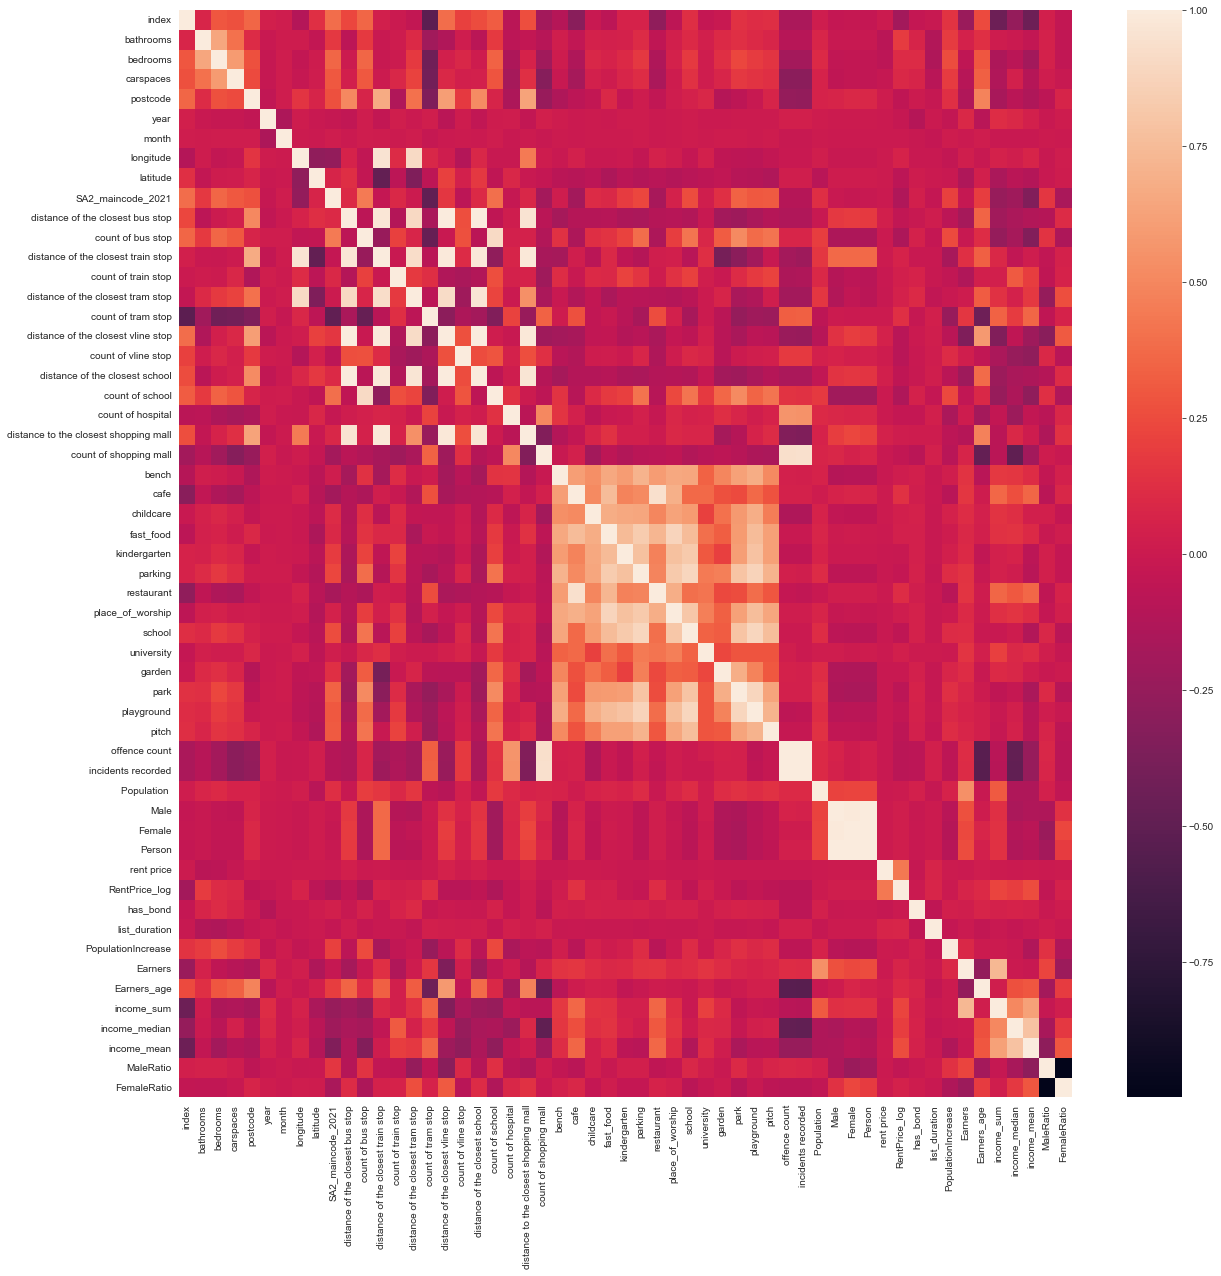

In [36]:
# Lets explore the correlations in our data set 
plt.figure(figsize=(20,20))
sns.heatmap(newdf.corr())

In [50]:
# house, unit, others 

newdf['ishouse'] = newdf['propertyTypes'].str.contains("house")


newdf['isapartment'] = newdf['propertyTypes'].str.contains("Unit|apartment")

newdf['isother'] = ~(newdf['isapartment'])& ~(newdf['ishouse'])

newdf = newdf.drop(['propertyTypes'], axis=1)

# newdf[newdf['isother'] == True]

In [46]:
# from sklearn.preprocessing import OneHotEncoder
# OH_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
# newdf = pd.DataFrame(OH_encoder.fit_transform(newdf['propertyTypes']))
# # OH_cols_valid = pd.DataFrame(OH_encoder.transform(X_valid[low_cardinality_cols]))
# newdf.head(4)


In [53]:
newdf

,index,bathrooms,bedrooms,carspaces,postcode,surburb,year,month,longitude,latitude,SA2_maincode_2021,distance of the closest bus stop,count of bus stop,distance of the closest train stop,count of train stop,distance of the closest tram stop,count of tram stop,distance of the closest vline stop,count of vline stop,distance of the closest school,count of school,count of hospital,distance to the closest shopping mall,count of shopping mall,bench,cafe,childcare,fast_food,kindergarten,parking,restaurant,place_of_worship,school,university,garden,park,playground,pitch,offence count,incidents recorded,Population,Male,Female,Person,rent price,RentPrice_log,has_bond,list_duration,PopulationIncrease,Earners,Earners_age,income_sum,income_median,income_mean,MaleRatio,FemaleRatio,ishouse,isapartment,isother
0,0,1.0,1.0,0.0,3205,south melbourne,2019,1,144.960873,-37.834163,206051512,0.436505,10,NaN,0,0.438447,24,NaN,0,0.441059,3.0,0,NaN,0,11.0,41.0,4.0,17.0,3.0,30.0,40.0,6.0,1.0,0.0,8.0,16.0,10.0,5.0,22895.0,17201.0,12753.000000,8441.000000,8501.000000,16942.000000,360.0,5.886104,0,1057,0.003541,12423.408655,44.336221,1.550108e+09,68332.737646,124820.972342,0.498229,0.501771,False,True,False
1,9,2.0,2.0,1.0,3205,south melbourne,2019,1,144.964862,-37.835075,206051512,0.432419,10,NaN,0,0.434362,24,NaN,0,0.436974,3.0,0,NaN,0,11.0,41.0,4.0,17.0,3.0,30.0,40.0,6.0,1.0,0.0,8.0,16.0,10.0,5.0,22895.0,17201.0,12753.000000,8441.000000,8501.000000,16942.000000,725.0,6.586172,0,78,0.003541,12423.408655,44.336221,1.550108e+09,68332.737646,124820.972342,0.498229,0.501771,True,False,False
2,10,1.0,2.0,0.0,3205,south melbourne,2019,1,144.960818,-37.840217,206051512,0.434637,10,NaN,0,0.436558,24,NaN,0,0.439169,3.0,0,NaN,0,11.0,41.0,4.0,17.0,3.0,30.0,40.0,6.0,1.0,0.0,8.0,16.0,10.0,5.0,22895.0,17201.0,12753.000000,8441.000000,8501.000000,16942.000000,500.0,6.214608,0,70,0.003541,12423.408655,44.336221,1.550108e+09,68332.737646,124820.972342,0.498229,0.501771,False,True,False
3,11,1.0,3.0,0.0,3205,south melbourne,2019,1,144.953039,-37.836653,206051512,0.443168,10,NaN,0,0.445094,24,NaN,0,0.447706,3.0,0,NaN,0,11.0,41.0,4.0,17.0,3.0,30.0,40.0,6.0,1.0,0.0,8.0,16.0,10.0,5.0,22895.0,17201.0,12753.000000,8441.000000,8501.000000,16942.000000,795.0,6.678342,0,69,0.003541,12423.408655,44.336221,1.550108e+09,68332.737646,124820.972342,0.498229,0.501771,True,False,False
4,21,2.0,2.0,0.0,3205,south melbourne,2019,1,144.949687,-37.837520,206051512,0.446094,10,NaN,0,0.448013,24,NaN,0,0.450625,3.0,0,NaN,0,11.0,41.0,4.0,17.0,3.0,30.0,40.0,6.0,1.0,0.0,8.0,16.0,10.0,5.0,22895.0,17201.0,12753.000000,8441.000000,8501.000000,16942.000000,825.0,6.715383,0,72,0.003541,12423.408655,44.336221,1.550108e+09,68332.737646,124820.972342,0.498229,0.501771,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114955,116020,1.0,3.0,1.0,3701,dartmouth,2022,5,147.493795,-36.536581,204031072,2.030447,1,NaN,0,NaN,0,NaN,0,1.480684,2.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,302.0,230.0,6181.185987,3156.644619,3024.668177,6181.185987,280.0,5.634790,0,26,0.004581,3701.919198,52.806122,2.014328e+08,41650.108033,54273.677385,0.510686,0.489335,True,False,False
114956,116027,1.0,3.0,1.0,3701,dartmouth,2022,6,147.494529,-36.536194,204031072,2.030108,1,NaN,0,NaN,0,NaN,0,1.480013,2.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,302.0,230.0,6181.185987,3156.644619,3024.668177,6181.185987,290.0,5.669881,0,50,0.004581,3701.919198,52.806122,2.014328e+08,41650.108033,54273.677385,0.510686,0.489335,True,False,False
114957,116052,1.0,3.0,2.0,3700,tallangatta,2022,8,147.258393,-36.221821,204031072,1.502645,1,NaN,0,NaN,0,NaN,0,1.495936,3.0,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,605.0,484.0,6181.185987,3156.644619,3024.668177,6181.185987,470.0,6.152733,

In [57]:
newdf=newdf.fillna(0)

In [60]:
newdf.head(3)

,index,bathrooms,bedrooms,carspaces,postcode,surburb,year,month,longitude,latitude,SA2_maincode_2021,distance of the closest bus stop,count of bus stop,distance of the closest train stop,count of train stop,distance of the closest tram stop,count of tram stop,distance of the closest vline stop,count of vline stop,distance of the closest school,count of school,count of hospital,distance to the closest shopping mall,count of shopping mall,bench,cafe,childcare,fast_food,kindergarten,parking,restaurant,place_of_worship,school,university,garden,park,playground,pitch,offence count,incidents recorded,Population,Male,Female,Person,rent price,RentPrice_log,has_bond,list_duration,PopulationIncrease,Earners,Earners_age,income_sum,income_median,income_mean,MaleRatio,FemaleRatio,ishouse,isapartment,isother
0,0,1.0,1.0,0.0,3205,south melbourne,2019,1,144.960873,-37.834163,206051512,0.436505,10,0.0,0,0.438447,24,0.0,0,0.441059,3.0,0,0.0,0,11.0,41.0,4.0,17.0,3.0,30.0,40.0,6.0,1.0,0.0,8.0,16.0,10.0,5.0,22895.0,17201.0,12753.0,8441.0,8501.0,16942.0,360.0,5.886104,0,1057,0.003541,12423.408655,44.336221,1.550108e+09,68332.737646,124820.972342,0.498229,0.501771,False,True,False
1,9,2.0,2.0,1.0,3205,south melbourne,2019,1,144.964862,-37.835075,206051512,0.432419,10,0.0,0,0.434362,24,0.0,0,0.436974,3.0,0,0.0,0,11.0,41.0,4.0,17.0,3.0,30.0,40.0,6.0,1.0,0.0,8.0,16.0,10.0,5.0,22895.0,17201.0,12753.0,8441.0,8501.0,16942.0,725.0,6.586172,0,78,0.003541,12423.408655,44.336221,1.550108e+09,68332.737646,124820.972342,0.498229,0.501771,True,False,False
2,10,1.0,2.0,0.0,3205,south melbourne,2019,1,144.960818,-37.840217,206051512,0.434637,10,0.0,0,0.436558,24,0.0,0,0.439169,3.0,0,0.0,0,11.0,41.0,4.0,17.0,3.0,30.0,40.0,6.0,1.0,0.0,8.0,16.0,10.0,5.0,22895.0,17201.0,12753.0,8441.0,8501.0,16942.0,500.0,6.214608,0,70,0.003541,12423.408655,44.336221,1.550108e+09,68332.737646,124820.972342,0.498229,0.501771,False,True,False


In [62]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
y = newdf['RentPrice_log']
X = newdf.drop(['RentPrice_log','surburb','longitude','latitude'], axis=1)
X_new = SelectKBest(k=10).fit_transform(X, y)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: divide by zero encountered in true_divide
  f = msb / msw


In [65]:
len(X_new[0])

10

In [68]:
from sklearn.feature_selection import SelectKBest, mutual_info_regression
#Select top 2 features based on mutual info regression
selector = SelectKBest(mutual_info_regression, k =10)
selector.fit(X, y)
X.columns[selector.get_support()]

Index(['index', 'postcode', 'SA2_maincode_2021',
       'distance of the closest bus stop', 'distance of the closest school',
       'offence count', 'Population ', 'rent price', 'PopulationIncrease',
       'income_mean'],
      dtype='object')